# Word Count


In [1]:
!python -m spacy download es_core_news_md

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [1]:
import os

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger

from wordcloud import WordCloud

import spacy
from spacy import displacy
import es_core_news_md

from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"
os.environ["JAVAHOME"] = "/usr/bin/java"

In [3]:
nlp = es_core_news_md.load()

In [4]:
# Creating a connection to MongoDB
client = MongoClient("localhost", 27017)
db = client["news"]
collection = db["elespectador"]

In [5]:
text = []
for news in list(collection.find({}, {"title": 1, "summary": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["summary"])
    text.append(news["full_text"])

KeyError: 'summary'

In [6]:
text = " ".join(text)

In [7]:
text

'La inteligencia ilegal a defensores de derechos será juzgada por la CorteIDH El Colectivo de Abogados José Alvear y el Centro por la Justicia y el Derecho Internacional llevaron ante el órgano internacional las estigmatizaciones a los que se enfrentan los defensores de derechos humanos en el país. En dos audiencias hablarán sobre amenazas, hostigamientos y exilios. A través de una resolución de 39 páginas, la Corte Interamericana de Derechos Humanos (CorteIDH) le dio el sí a Colombia para juzgar, por primera vez, la vigilancia e inteligencia ilegal a defensores de derechos humanos. El tema llegó al organismo internacional por cuenta de una serie de denuncias que hizo el Colectivo de Abogados José Alvear (Cajar) junto con el Centro por la Justicia y el Derecho Internacional (Cejil) quienes consignan que esas actividades han sido perpetradas por diferentes organismos del Estado desde hace un poco más de 30 años. Aunque el Estado colombiano ha sido cuestionado varias veces por vulneració

In [8]:
# Word tokenization
words = word_tokenize(text)

In [9]:
words[:10]

['La',
 'inteligencia',
 'ilegal',
 'a',
 'defensores',
 'de',
 'derechos',
 'será',
 'juzgada',
 'por']

In [10]:
# Words distribution
frec_dist = FreqDist(words)

In [11]:
# Printing the most common words
frec_dist.most_common(10)

[('de', 6987),
 (',', 5987),
 ('la', 4146),
 ('.', 3258),
 ('que', 3254),
 ('en', 2894),
 ('el', 2734),
 ('y', 2350),
 ('a', 1972),
 ('las', 1447)]

In [12]:
# Stop words
# Stop words are basically a set of commonly used words in any language, not just English.
# The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.
nltk.download('stopwords')
stop_words = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xeraz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [14]:
# Removing stop words
filtered_words = []

for w in words:
    if w.lower() not in stop_words:
        filtered_words.append(w)

In [15]:
# Words distribution for text without stopwords
frec_dist_filtered = FreqDist(filtered_words)

In [16]:
# Printing the most common words
frec_dist_filtered.most_common(10)

[(',', 5987),
 ('.', 3258),
 ('“', 710),
 ('”', 707),
 (':', 629),
 (')', 399),
 ('(', 397),
 ('personas', 204),
 ('Colombia', 176),
 ('?', 165)]

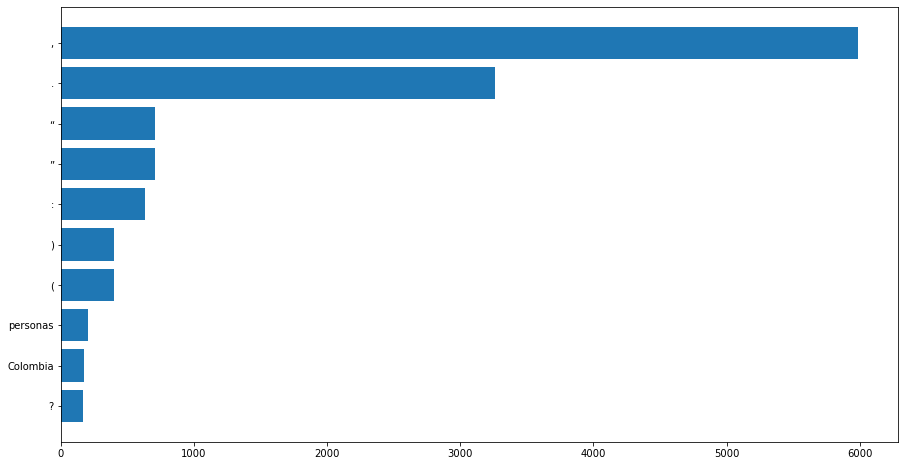

In [17]:
# Plotting a bar char for frecuencies
n = 10

plt.figure(figsize = (15, 8))
plt.barh([ w[0] for w in frec_dist_filtered.most_common(n) ], [ w[1] for w in frec_dist_filtered.most_common(n) ])
plt.gca().invert_yaxis()

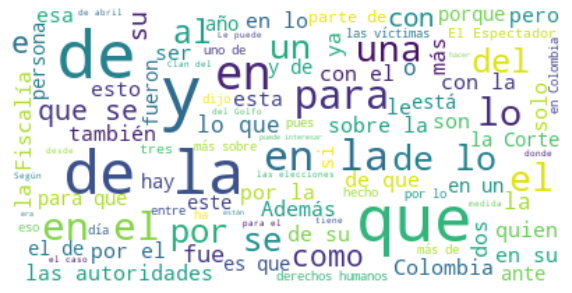

In [18]:
# Creating the wordcloud
# Word size is directly related to frecuency
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

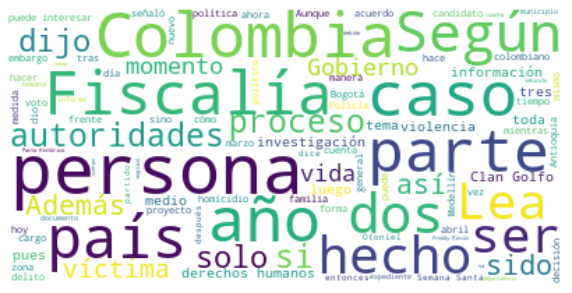

In [19]:
# Creating the wordcloud without stopwords
# Word size is directly related to frecuency
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(" ".join(filtered_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [20]:
# Part of Speech (PoS)
# Model optimized for spanish: https://nlp.stanford.edu/software/
pos_tagger = StanfordPOSTagger(model, jar, encoding = "utf8")
pos_tags = pos_tagger.tag(filtered_words)

In [21]:
pos_tags.sort(key = lambda tup: tup[1])
pos_tags

[('ilegal', 'ADJ'),
 ('defensores', 'ADJ'),
 ('juzgada', 'ADJ'),
 ('internacional', 'ADJ'),
 ('hostigamientos', 'ADJ'),
 ('primera', 'ADJ'),
 ('ilegal', 'ADJ'),
 ('defensores', 'ADJ'),
 ('internacional', 'ADJ'),
 ('junto', 'ADJ'),
 ('diferentes', 'ADJ'),
 ('colombiano', 'ADJ'),
 ('nuevo', 'ADJ'),
 ('colectivos', 'ADJ'),
 ('estigmatizaciones', 'ADJ'),
 ('defensores', 'ADJ'),
 ('exilios', 'ADJ'),
 ('visto', 'ADJ'),
 ('obligados', 'ADJ'),
 ('defensora', 'ADJ'),
 ('integrante', 'ADJ'),
 ('realizado', 'ADJ'),
 ('personales', 'ADJ'),
 ('económicas', 'ADJ'),
 ('derivado', 'ADJ'),
 ('posibles', 'ADJ'),
 ('llegado', 'ADJ'),
 ('integrante', 'ADJ'),
 ('normativo', 'ADJ'),
 ('colombiano', 'ADJ'),
 ('interna', 'ADJ'),
 ('internacionales', 'ADJ'),
 ('”', 'ADJ'),
 ('profes', 'ADJ'),
 ('normativo', 'ADJ'),
 ('internacionales', 'ADJ'),
 ('jurídico', 'ADJ'),
 ('colombiano', 'ADJ'),
 ('pertinentes', 'ADJ'),
 ('internacionales', 'ADJ'),
 ('personales', 'ADJ'),
 ('personales', 'ADJ'),
 ('colombiano', 'ADJ'

In [22]:
len(pos_tags)

63988

In [23]:
pos_tags[-100:]

[('vemos', 'VERB'),
 ('vemos', 'VERB'),
 ('generando', 'VERB'),
 ('haciendo', 'VERB'),
 ('facilitar', 'VERB'),
 ('olvidar', 'VERB'),
 ('Queremos', 'VERB'),
 ('quiera', 'VERB'),
 ('estudiar', 'VERB'),
 ('optar', 'VERB'),
 ('imaginamos', 'VERB'),
 ('generando', 'VERB'),
 ('¿Qué', 'VERB'),
 ('soporte', 'VERB'),
 ('interesar', 'VERB'),
 ('usa', 'VERB'),
 ('crear', 'VERB'),
 ('logramos', 'VERB'),
 ('¿Ayudaríamos', 'VERB'),
 ('logren', 'VERB'),
 ('ayudó', 'VERB'),
 ('deber', 'VERB'),
 ('sirva', 'VERB'),
 ('llegar', 'VERB'),
 ('logra', 'VERB'),
 ('jugó', 'VERB'),
 ('Consideramos', 'VERB'),
 ('dieron', 'VERB'),
 ('compartieron', 'VERB'),
 ('lograr', 'VERB'),
 ('diferencia', 'VERB'),
 ('creemos', 'VERB'),
 ('trabajamos', 'VERB'),
 ('generar', 'VERB'),
 ('faciliten', 'VERB'),
 ('acercando', 'VERB'),
 ('aprendido', 'VERB'),
 ('descubrimos', 'VERB'),
 ('haces', 'VERB'),
 ('rodea', 'VERB'),
 ('permitirá', 'VERB'),
 ('superar', 'VERB'),
 ('presenten', 'VERB'),
 ('perseverar', 'VERB'),
 ('luchando', 

In [24]:
# Named Entity Recognition (NER)
document = nlp(text)
displacy.render(document, style = "ent")